# Statistical analysis by Parametric Test(1.T_test)

# Step 1:Load the data

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
one_sample=pd.read_csv("C:/Users/Admin/Downloads/retail_one_sample_ttest_dataset.csv")
two_sample=pd.read_csv("C:/Users/Admin/Downloads/retail_independent_ttest_dataset.csv")
paired_sample=pd.read_csv("C:/Users/Admin/Downloads/retail_paired_ttest_dataset.csv")

In [3]:
one_sample

,store_id,store_area,items_available,daily_customer_count,monthly_sales,num_employees,store_age
0,7,1284.466734,725,506,20568.040633,11,18
1,15,1435.965854,1324,509,23637.098858,18,17
2,11,1593.272270,2765,500,11176.428748,33,7
3,8,1942.606865,1436,537,28693.108672,23,13
4,7,1757.297887,2806,468,17844.150571,23,18
...,...,...,...,...,...,...,...
495,17,1614.722924,1235,547,30127.336710,41,12
496,7,1549.935662,2838,498,20665.482229,32,3
497,13,1647.735379,2463,500,23683.745244,29,10
498,4,1586.750593,2649,528,20061.609082,20,17


# step2: Data Processing and EDA:

In [4]:
one_sample.isnull().sum()

store_id                0
store_area              0
items_available         0
daily_customer_count    0
monthly_sales           0
num_employees           0
store_age               0
dtype: int64

In [5]:
one_sample.duplicated().sum()

0

In [6]:
one_sample.describe().T

,count,mean,std,min,25%,50%,75%,max
store_id,500.0,9.616000,5.662922,1.000000,4.750000,9.000000,15.000000,19.000000
store_area,500.0,1500.033666,299.278880,690.934007,1288.959528,1494.370598,1692.086499,2423.664243
items_available,500.0,1761.688000,713.102689,501.000000,1185.500000,1765.500000,2425.000000,2977.000000
daily_customer_count,500.0,499.588000,21.834003,438.000000,483.000000,500.000000,515.000000,565.000000
monthly_sales,500.0,22442.763482,5137.782731,7492.381587,19378.585124,22570.226365,25626.600346,38302.455403
num_employees,500.0,27.006000,12.525324,5.000000,17.000000,26.000000,37.000000,49.000000
store_age,500.0,10.340000,5.375331,1.000000,6.000000,11.000000,15.000000,19.000000


In [7]:
one_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   store_id              500 non-null    int64  
 1   store_area            500 non-null    float64
 2   items_available       500 non-null    int64  
 3   daily_customer_count  500 non-null    int64  
 4   monthly_sales         500 non-null    float64
 5   num_employees         500 non-null    int64  
 6   store_age             500 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 27.5 KB


In [8]:
one_sample.corr()

,store_id,store_area,items_available,daily_customer_count,monthly_sales,num_employees,store_age
store_id,1.000000,-0.023099,0.000196,-0.022579,-0.006857,-0.023616,0.037807
store_area,-0.023099,1.000000,-0.051489,0.032645,0.059209,0.011271,0.025188
items_available,0.000196,-0.051489,1.000000,-0.058742,-0.043924,-0.004687,0.052051
daily_customer_count,-0.022579,0.032645,-0.058742,1.000000,0.032009,0.045449,0.084437
monthly_sales,-0.006857,0.059209,-0.043924,0.032009,1.000000,-0.012926,0.061107
num_employees,-0.023616,0.011271,-0.004687,0.045449,-0.012926,1.000000,-0.005358
store_age,0.037807,0.025188,0.052051,0.084437,0.061107,-0.005358,1.000000


In [9]:
one_sample.shape

(500, 7)

In [10]:
one_sample.head(5)

,store_id,store_area,items_available,daily_customer_count,monthly_sales,num_employees,store_age
0,7,1284.466734,725,506,20568.040633,11,18
1,15,1435.965854,1324,509,23637.098858,18,17
2,11,1593.272270,2765,500,11176.428748,33,7
3,8,1942.606865,1436,537,28693.108672,23,13
4,7,1757.297887,2806,468,17844.150571,23,18


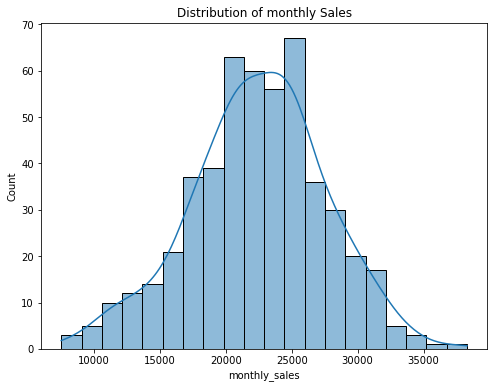

In [11]:
#visualize the sales distribution
plt.figure(figsize=(8,6))
sns.histplot(one_sample['monthly_sales'],kde=True)
plt.title("Distribution of monthly Sales")
plt.show()

The bell curve (normal distribution) suggests that the data is symmetrically distributed around the mean.

#  step 3:One Sample t-test:

In [12]:
#hypothesized mean
hypothesized_mean=22000 

#perform one sample t test
t_stats,p_value=stats.ttest_1samp(one_sample['monthly_sales'],hypothesized_mean)

#define alpha
alpha=0.05
print(f't-statistics of one sample: {t_stats}')
print(f'p-value of one sample: {p_value}','\n')

#determine if we reject the null hypothesis or not
if p_value<alpha:
    print("Reject the null hypothesis: The average monthly sales is significantly different from $22000")
else:
    print("Fail to reject null hypothesis : There is no enough evidence to say that the avg monthly sales is different from $22000")

t-statistics of one sample: 1.9269971027222859
p-value of one sample: 0.05454743294165262 

Fail to reject null hypothesis : There is no enough evidence to say that the avg monthly sales is different from $22000


# step 4: Independent Sample T-test

# a.Data Processing and EDA

In [13]:
two_sample

,store_id,store_area,items_available,daily_customer_count,monthly_sales,num_employees,store_location
0,7,1284.466734,725,506,20568.040633,11,Rural
1,15,1435.965854,1324,509,23637.098858,18,Rural
2,11,1593.272270,2765,500,11176.428748,33,Urban
3,8,1942.606865,1436,537,28693.108672,23,Urban
4,7,1757.297887,2806,468,17844.150571,23,Rural
...,...,...,...,...,...,...,...
495,17,1614.722924,1235,547,30127.336710,41,Rural
496,7,1549.935662,2838,498,20665.482229,32,Rural
497,13,1647.735379,2463,500,23683.745244,29,Urban
498,4,1586.750593,2649,528,20061.609082,20,Rural


In [14]:
#calculate the descriptive stats
two_sample.describe().T

,count,mean,std,min,25%,50%,75%,max
store_id,500.0,9.616000,5.662922,1.000000,4.750000,9.000000,15.000000,19.000000
store_area,500.0,1500.033666,299.278880,690.934007,1288.959528,1494.370598,1692.086499,2423.664243
items_available,500.0,1761.688000,713.102689,501.000000,1185.500000,1765.500000,2425.000000,2977.000000
daily_customer_count,500.0,499.588000,21.834003,438.000000,483.000000,500.000000,515.000000,565.000000
monthly_sales,500.0,22442.763482,5137.782731,7492.381587,19378.585124,22570.226365,25626.600346,38302.455403
num_employees,500.0,27.006000,12.525324,5.000000,17.000000,26.000000,37.000000,49.000000


In [15]:
two_sample.isnull().sum()

store_id                0
store_area              0
items_available         0
daily_customer_count    0
monthly_sales           0
num_employees           0
store_location          0
dtype: int64

In [16]:
two_sample.duplicated().sum()

0

In [17]:
two_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   store_id              500 non-null    int64  
 1   store_area            500 non-null    float64
 2   items_available       500 non-null    int64  
 3   daily_customer_count  500 non-null    int64  
 4   monthly_sales         500 non-null    float64
 5   num_employees         500 non-null    int64  
 6   store_location        500 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 27.5+ KB


In [18]:
two_sample.shape

(500, 7)

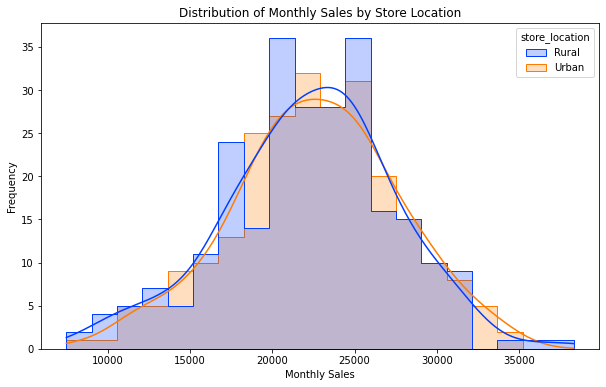

In [19]:
# Visualize the data distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=two_sample, x='monthly_sales', hue='store_location', kde=True, element='step',palette='bright')
plt.title('Distribution of Monthly Sales by Store Location')
plt.xlabel('Monthly Sales')
plt.ylabel('Frequency')
plt.show()

# b.Independent Sample T-test

In [20]:
#seperate data in to two groups
urban_sales=two_sample[two_sample['store_location']=='Urban']['monthly_sales']
rural_sales=two_sample[two_sample['store_location']=='Rural']['monthly_sales']

#perform independent sample t-test
t_statistics,p_val=stats.ttest_ind(urban_sales,rural_sales)

#print the test result
print(f't_statistics for independent sample: {t_statistics}')
print(f'probability value for independent sample: {p_val}','\n')

#determine if we reject the null hypothesis or not
alpha=0.05
if p_val <alpha:
    print('Reject the null hypothesis: There is significant difference between average monthly sales between urban and rural')
else:
    print('Fail to reject null hypothesis: There is not enough evidence to say that the avg monthly sales between urban and rural stores is different')



t_statistics for independent sample: 0.7723822331410712
probability value for independent sample: 0.44025446821942793 

Fail to reject null hypothesis: There is not enough evidence to say that the avg monthly sales between urban and rural stores is different


# Step 5: Paired Sample T-test

# a.Data Processing and EDA

In [21]:
paired_sample

,store_id,store_area,items_available,daily_customer_count,monthly_sales_before,monthly_sales_after,num_employees
0,7,1284.466734,725,506,18568.040633,30220.955444,49
1,15,1435.965854,1324,509,21637.098858,40609.484487,27
2,11,1593.272270,2765,500,9176.428748,23191.200558,9
3,8,1942.606865,1436,537,26693.108672,31076.607873,34
4,7,1757.297887,2806,468,15844.150571,23370.443436,10
...,...,...,...,...,...,...,...
495,17,1614.722924,1235,547,28127.336710,20080.335584,8
496,7,1549.935662,2838,498,18665.482229,23640.898484,15
497,13,1647.735379,2463,500,21683.745244,22000.855617,36
498,4,1586.750593,2649,528,18061.609082,19168.810531,11


In [22]:
#calculate the descriptie stats
paired_sample.describe().T

,count,mean,std,min,25%,50%,75%,max
store_id,500.0,9.616000,5.662922,1.000000,4.750000,9.000000,15.000000,19.000000
store_area,500.0,1500.033666,299.278880,690.934007,1288.959528,1494.370598,1692.086499,2423.664243
items_available,500.0,1761.688000,713.102689,501.000000,1185.500000,1765.500000,2425.000000,2977.000000
daily_customer_count,500.0,499.588000,21.834003,438.000000,483.000000,500.000000,515.000000,565.000000
monthly_sales_before,500.0,20442.763482,5137.782731,5492.381587,17378.585124,20570.226365,23626.600346,36302.455403
monthly_sales_after,500.0,25135.386884,4948.120938,10355.243176,21680.707808,25376.293679,28357.496337,40609.484487
num_employees,500.0,26.780000,12.965794,5.000000,16.000000,26.000000,38.000000,49.000000


In [23]:
paired_sample.isnull().sum()

store_id                0
store_area              0
items_available         0
daily_customer_count    0
monthly_sales_before    0
monthly_sales_after     0
num_employees           0
dtype: int64

In [24]:
paired_sample.duplicated().sum()

0

In [25]:
paired_sample.shape

(500, 7)

In [26]:
paired_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   store_id              500 non-null    int64  
 1   store_area            500 non-null    float64
 2   items_available       500 non-null    int64  
 3   daily_customer_count  500 non-null    int64  
 4   monthly_sales_before  500 non-null    float64
 5   monthly_sales_after   500 non-null    float64
 6   num_employees         500 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 27.5 KB


# Distribution on monthly sales before and after

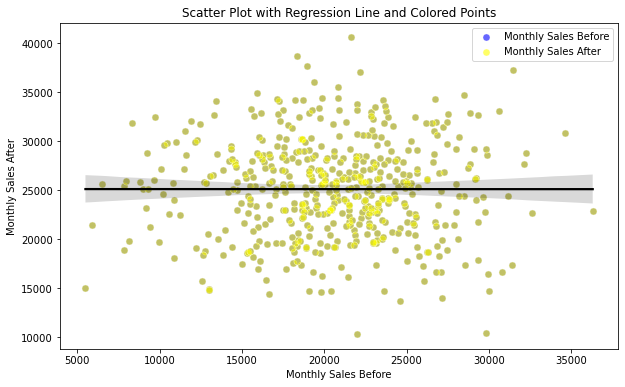

In [64]:
plt.figure(figsize=(10, 6))

# Scatter plot for 'monthly_sales_before' in red
sns.scatterplot(x='monthly_sales_before', y='monthly_sales_after', data=paired_sample, color='blue', s=50, alpha=0.6, label='Monthly Sales Before')

# Scatter plot for 'monthly_sales_after' in blue
sns.scatterplot(x='monthly_sales_before', y='monthly_sales_after', data=paired_sample, color='yellow', s=50, alpha=0.6, label='Monthly Sales After')

# Fit the regression line on the combined data
sns.regplot(x='monthly_sales_before', y='monthly_sales_after', data=paired_sample, scatter=False, color='black')

plt.xlabel('Monthly Sales Before')
plt.ylabel('Monthly Sales After')
plt.title('Scatter Plot with Regression Line and Colored Points')
plt.legend()
plt.show()

# b.paired sample T_test

In [27]:
#perform paired sample t_test

t_stats1,p_val1=stats.ttest_rel(paired_sample['monthly_sales_before'],paired_sample['monthly_sales_after'])

#Print the test result
print(f't-statistics of paired sample is: {t_stats1}')
print(f'Probablity value of paired sample is: {p_val1}','\n')

#determine if we reject the null hypothesis or not
alpha=0.05
if p_val1<alpha:
    print("Reject the null hypothesis: There is significant difference between average monthly sales before and after the marketing campaign")
else:
    print("Reject the null hypothesis: There is not enough evidence to say that the average monthly sales before and after the marketing campaign is different")

t-statistics of paired sample is: -14.70847243833469
Probablity value of paired sample is: 6.105558488766786e-41 

Reject the null hypothesis: There is significant difference between average monthly sales before and after the marketing campaign
